<a href="https://colab.research.google.com/github/AmerAhmed/Applicerad-AI/blob/main/amer_amir_abshir_elvir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruis Datasets


Tthis is just one example of how machine learning could be used to classify fresh and rotten fruits. There are many other potential approaches and techniques that could be used as well.

Start by collecting a dataset of images of fresh and rotten fruits. We will need a large number of images, with a roughly equal number of examples of each class (fresh and rotten). We should also make sure that the images are of good quality and resolution, and that they are correctly labeled as fresh or rotten.

Preprocess the images by resizing them to a uniform size and normalizing their pixel values. This will help ensure that the model can more easily learn from the data.

Split the dataset into training and test sets. We should use the training set to train the model, and the test set to evaluate its performance.

Use TensorFlow and Keras to build a convolutional neural network (CNN) to classify the images. A CNN is a type of deep learning model that is well-suited for image classification tasks. You will need to specify the structure of the CNN, including the number of layers and the number of filters in each layer.

Train the model on the training set. This will involve feeding the images and their labels into the model and adjusting the model's weights and biases to minimize the error between the predicted labels and the true labels.

Evaluate the model's performance on the test set. This will involve using the model to classify the test images and comparing the predicted labels to the true labels. You can use metrics like accuracy, precision, and recall to measure the model's performance.

If the model's performance is not satisfactory, we can try fine-tuning the model by adjusting its hyperparameters or adding more layers or filters. You can also try augmenting the dataset by generating additional examples through techniques like rotation, scaling, or cropping.

This is just a high-level overview of the process for building a machine learning model to classify images of fruits as fresh or rotten. There are many details and considerations that we will need to take into account as you build and fine-tune our model.


In [1]:
import os
import shutil
import warnings
import numpy as np
import tensorflow as tf
warnings.filterwarnings('ignore')
from google.colab import drive
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [2]:
print(tf.__version__)

2.9.2


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Path train and test from dataset 

In [4]:
TRAIN_PATH = r'/content/drive/My Drive/Colab Notebooks/Fruits/Datasets/train'
TEST_PATH = r'/content/drive/My Drive/Colab Notebooks/Fruits/Datasets/test'
SIZE = (240, 240)

# Iterate through the labels to create a dataframe of the form classes

In [5]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)
print(labels)

['Fresh_Banana', 'Fresh_Apple', 'Rotten_Banana', 'Rotten_Lemon', 'Fresh_Lemon', 'Rotten_Apple', 'Fresh_Orange', 'Rotten_Orange']


# Rescale datagen and test_datagen using ImageDataGenerator

In [6]:
datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 

# Create train_dataset and validation  generators

In [7]:
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 8076 images belonging to 8 classes.
Found 893 images belonging to 8 classes.


# Visualizationto sample training images

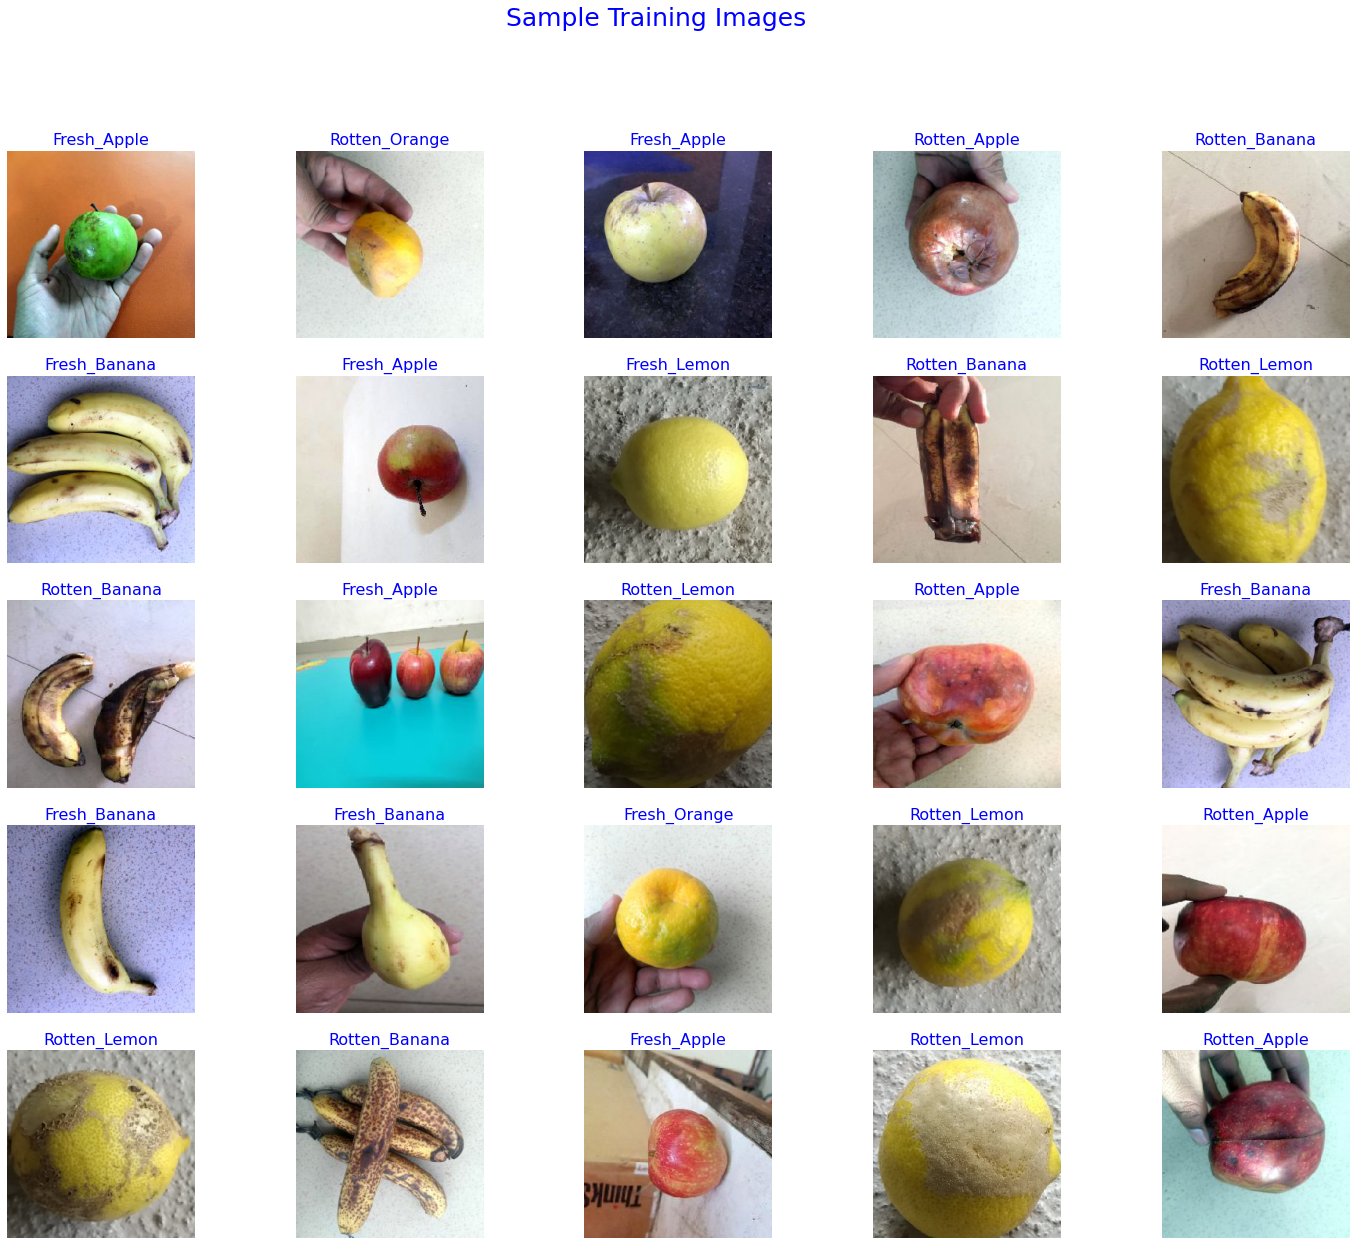

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))
idx = 0
for i in range(5):
    for j in range(5):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}", color='blue',fontsize=16)
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1
plt.suptitle("Sample Training Images", color='blue', fontsize=25)
plt.show()

# Create the model 

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Model summary

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 119, 119, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 58, 58, 64)        0

# Instantiate the custom train fit the model

In [11]:
history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))

Epoch 1/12
253/253 [==============================] - 974s 4s/step - loss: 1.0100 - accuracy: 0.6630 - val_loss: 1.9319 - val_accuracy: 0.4614
Epoch 2/12
253/253 [==============================] - 968s 4s/step - loss: 0.2320 - accuracy: 0.9243 - val_loss: 1.9059 - val_accuracy: 0.4726
Epoch 3/12
253/253 [==============================] - 963s 4s/step - loss: 0.1147 - accuracy: 0.9629 - val_loss: 2.6011 - val_accuracy: 0.5498
Epoch 4/12
253/253 [==============================] - 964s 4s/step - loss: 0.0973 - accuracy: 0.9673 - val_loss: 2.2870 - val_accuracy: 0.5577
Epoch 5/12
253/253 [==============================] - 963s 4s/step - loss: 0.0749 - accuracy: 0.9735 - val_loss: 2.6398 - val_accuracy: 0.5174
Epoch 6/12
253/253 [==============================] - 963s 4s/step - loss: 0.0583 - accuracy: 0.9799 - val_loss: 2.7107 - val_accuracy: 0.4602
Epoch 7/12
253/253 [==============================] - 964s 4s/step - loss: 0.0587 - accuracy: 0.9796 - val_loss: 2.3692 - val_accuracy: 0.5767

# Generate accuracy and val_accuracy

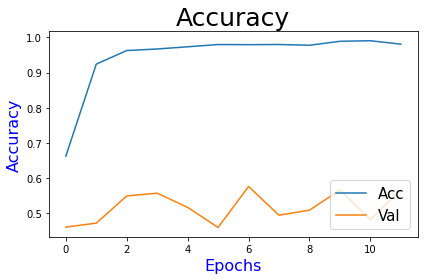

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy', color="black",fontsize=25)
plt.xlabel('Epochs', color="blue",fontsize=16)
plt.ylabel('Accuracy', color="blue",fontsize=16)
plt.legend(['Acc','Val'],fontsize=15, loc = 'lower right')
plt.tight_layout()
plt.show()

# Generate loss and val_loss

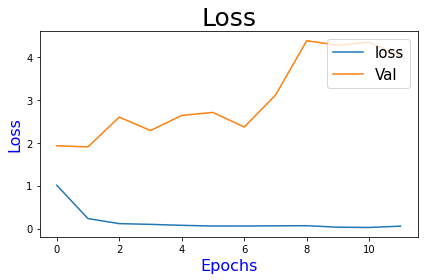

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss', color="black",fontsize=25)
plt.xlabel('Epochs',color="blue",fontsize=16)
plt.ylabel('Loss', color="blue",fontsize=16)
plt.legend(['loss','Val'],fontsize=15, loc = 'upper right')
plt.tight_layout()
plt.show()

# Evaluate model on the test then show accuracy test and loss test

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 8969 images belonging to 8 classes.
8969/8969 [==============================] - 1450s 162ms/step - loss: 0.4120 - accuracy: 0.9528
accuracy test:  0.9528375267982483
loss test:  0.4119983911514282


# Make predictions on test

In [19]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]    
    prob=p[index]

8969/8969 [==============================] - 381s 42ms/step


In [20]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

1
(1, 8)


# Test dataset predictions

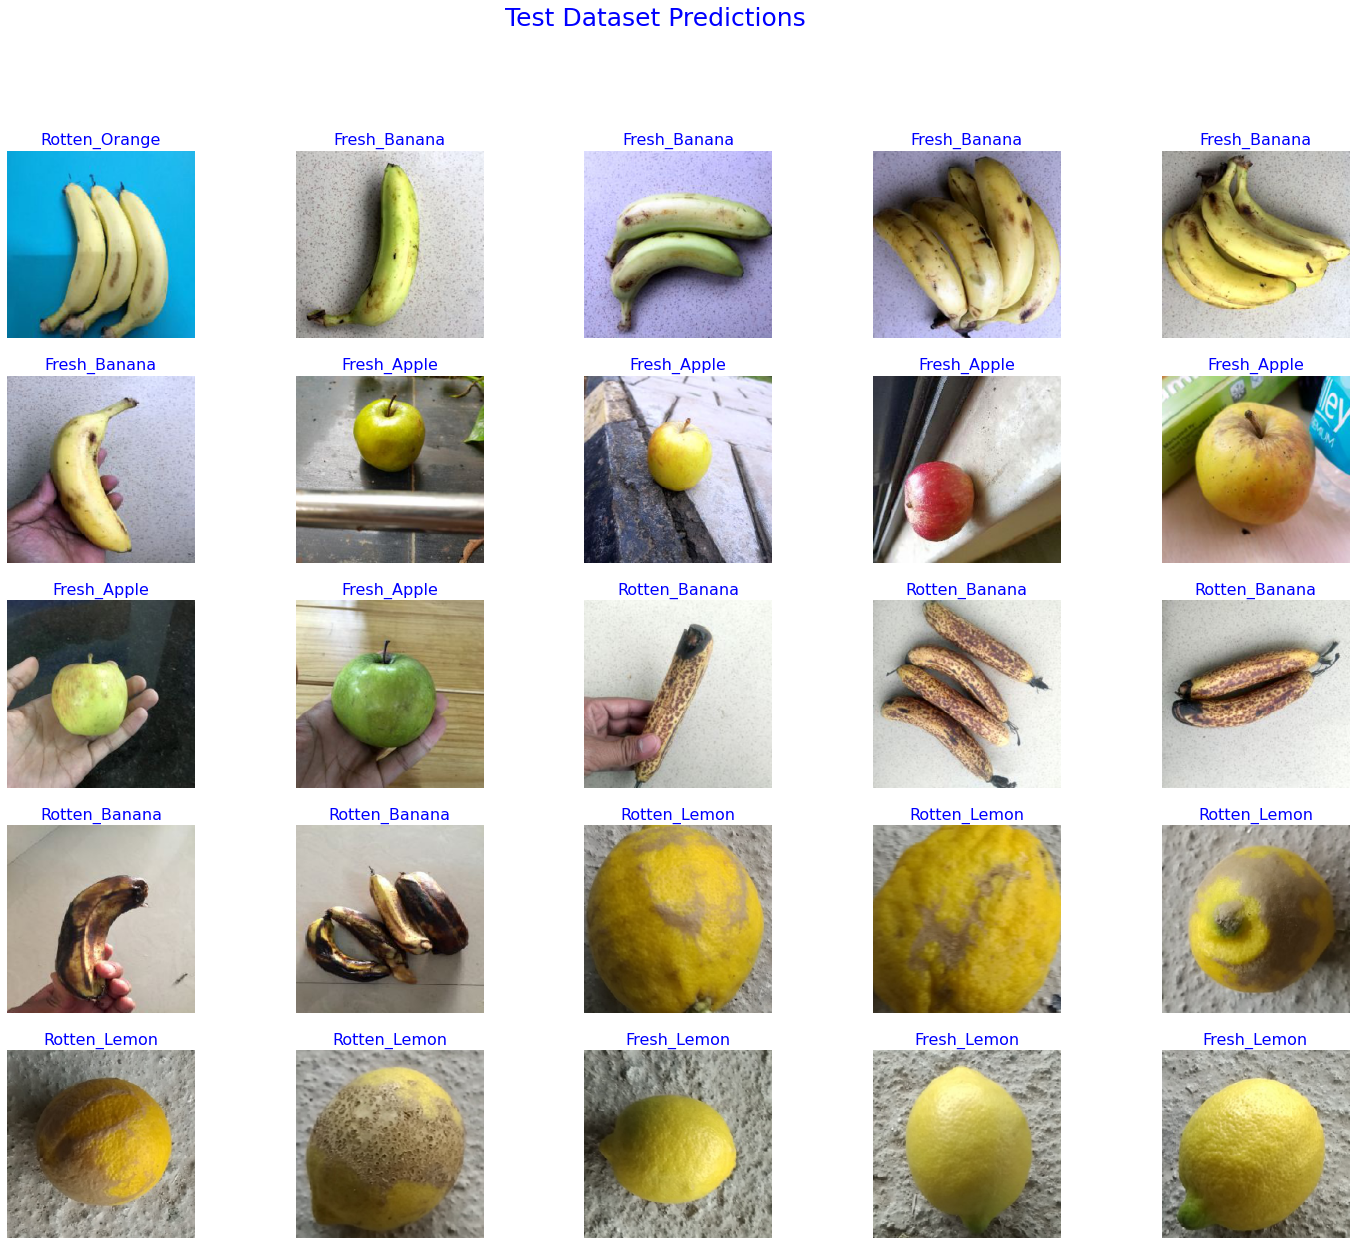

In [21]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25, 20))
idx = 0

for i in range(5):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}", color='blue',fontsize=16)
        ax[i, j].imshow(test_generator[idx][0].reshape(240,240,3))
        ax[i, j].axis("off")
        idx += 200
plt.suptitle("Test Dataset Predictions", color='blue', fontsize=25)
plt.show()

# Plot model to diagram

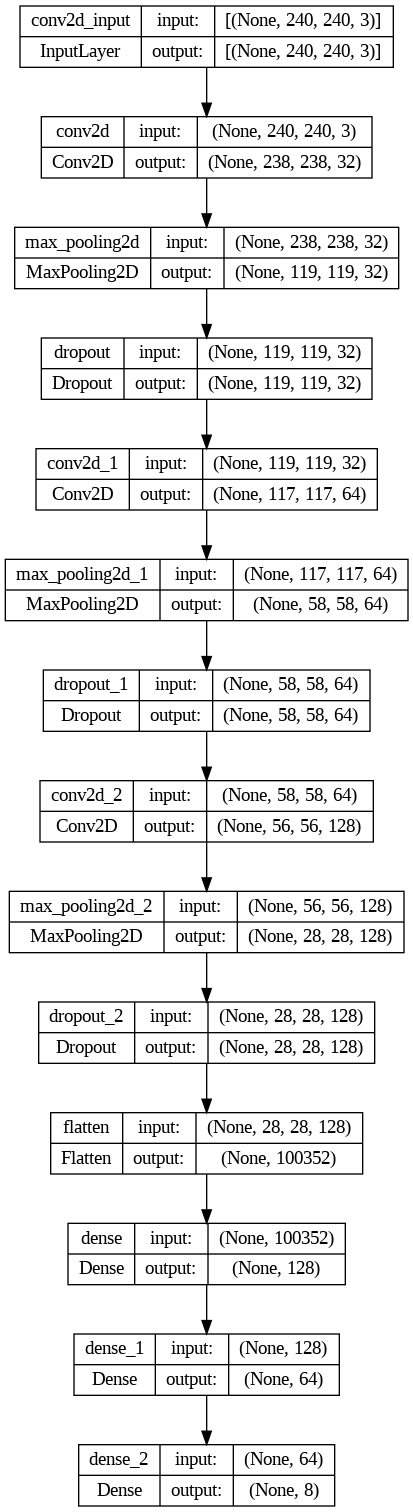

In [22]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=True, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [23]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 16.5 MB/s eta 0:00:00


In [35]:
from keras import layers
from collections import defaultdict
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#f0d507'

# Predictions on test

In [36]:
test_steps_per_epoch = np.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [40]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [41]:
print(true_classes)
print(class_labels)

[0 0 0 ... 7 7 7]
['Fresh_Banana', 'Fresh_Apple', 'Rotten_Banana', 'Rotten_Lemon', 'Fresh_Lemon', 'Rotten_Apple', 'Fresh_Orange', 'Rotten_Orange']


# Classification report

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

               precision    recall  f1-score   support

 Fresh_Banana       0.97      0.96      0.97      1136
  Fresh_Apple       0.85      0.97      0.91      1134
Rotten_Banana       0.97      0.93      0.95      1087
 Rotten_Lemon       0.99      0.97      0.98       951
  Fresh_Lemon       0.98      1.00      0.99      1135
 Rotten_Apple       0.99      0.91      0.95      1141
 Fresh_Orange       0.97      0.92      0.94      1226
Rotten_Orange       0.93      0.96      0.95      1159

     accuracy                           0.95      8969
    macro avg       0.96      0.95      0.95      8969
 weighted avg       0.96      0.95      0.95      8969



# Print out confusion matrix 

In [43]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, predicted_classes))
cm = confusion_matrix(test_generator.classes, predicted_classes)

Confusion Matrix
[[1090   26    2    0    0    0    5   13]
 [   0 1105    2    0    2    7   11    7]
 [  30   48 1008    0    0    0    0    1]
 [   0    0    0  927   24    0    0    0]
 [   0    0    0    1 1133    0    1    0]
 [   0   67   20    0    0 1043    8    3]
 [   1   39    1    0    0    1 1123   61]
 [   0   17    6    8    0    1   10 1117]]


# ConfusionMatrixDisplay

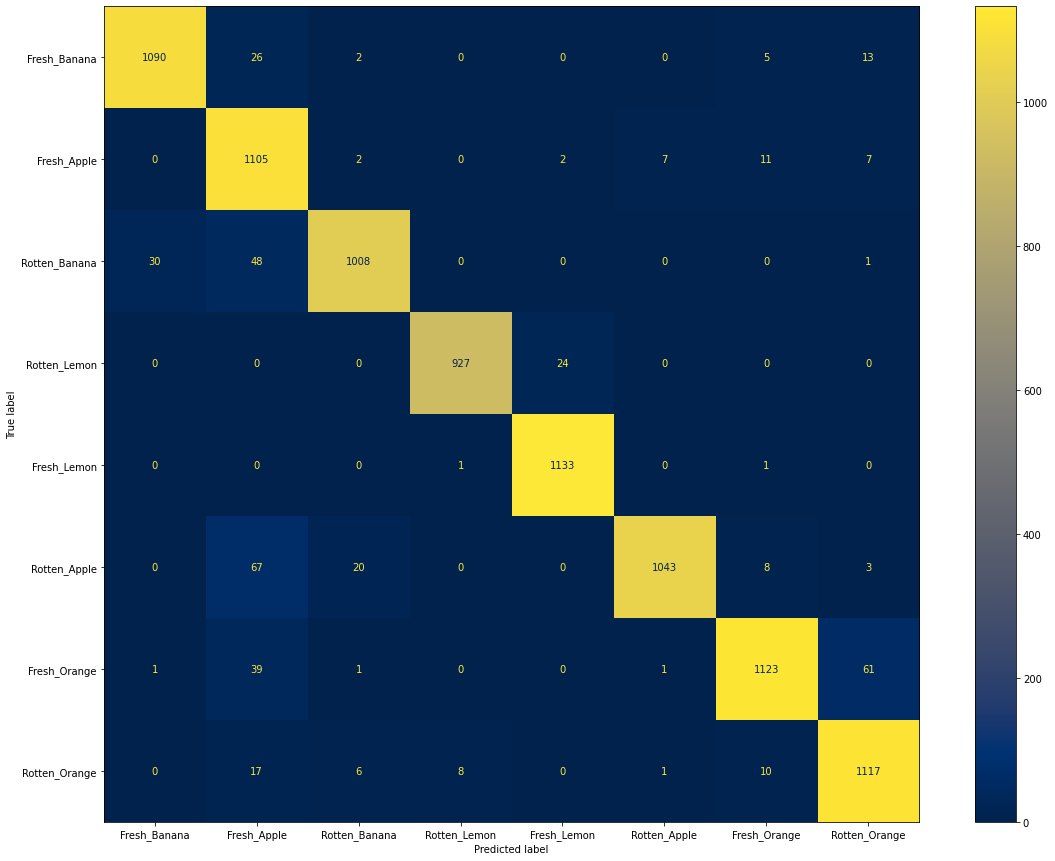

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(20,15))
disp.plot(ax=ax,cmap="cividis")
plt.show()